In [27]:
stocks = ['AAPL','ABT','ADBE','AMZN','AVGO','BMY','C',
         'COST','CVX','DIS','FB','GOOG','HON','IBM','JNJ','JPM',
          'MA','MCD','MDT','MRK','MSFT','NEE','NKE','ORCL','PEP',
          'PFE','PG','T','TXN','UNP','UTX','V','VZ','WMT','XOM',
           'HD','KO','CMCSA','SPY'
         ]
import quandl
import pandas as pd
import pytz
from collections import OrderedDict

    
quandl.ApiConfig.api_key = "uRMo697HgMj91ZZZa2_v"
data = OrderedDict()
for i in stocks:
    data[i] = quandl.get('EOD/{}'.format(i),start_date='2009-01-01', end_date='2020-01-25')
    data[i] = data[i][['Open','High','Low','Close','Volume']]
    data[i] = data[i].rename(columns={"Open": "open", "High": "high",'Close':"close","Low":"low","Volume":"volume"})
    print(data[i].head())
panel = pd.Panel(data)
panel.minor_axis = ["open","high","low","close","volume"]
panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
print(panel)

             open   high    low  close      volume
Date                                              
2009-01-02  85.88  91.04  85.16  90.75  26643400.0
2009-01-05  93.17  96.18  92.71  94.58  42200300.0
2009-01-06  95.95  97.17  92.39  93.02  46046800.0
2009-01-07  91.81  92.50  90.26  91.01  26894600.0
2009-01-08  90.43  93.15  90.04  92.70  24053600.0
             open   high    low  close      volume
Date                                              
2009-01-02  53.53  53.85  52.37  53.56  13163100.0
2009-01-05  53.20  53.48  52.07  52.64  13093300.0
2009-01-06  52.85  53.22  50.06  50.92  29167500.0
2009-01-07  50.37  51.38  50.25  50.64  22917600.0
2009-01-08  50.70  51.82  50.70  51.20  18202100.0
               open     high    low  close      volume
Date                                                  
2009-01-02  21.1109  23.1000  21.07  23.02   6670700.0
2009-01-05  22.5200  23.3100  22.50  23.13   7385500.0
2009-01-06  23.0700  24.4500  23.07  24.22   7032500.0
2009-01-07 

             open   high      low  close      volume
Date                                                
2009-01-02  17.64  18.48  17.6200  18.41  27833600.0
2009-01-05  18.19  18.25  17.8600  18.09  28309400.0
2009-01-06  18.17  18.70  18.0300  18.39  29856600.0
2009-01-07  18.06  18.25  17.4800  17.65  38635700.0
2009-01-08  17.50  17.67  17.3127  17.62  35148700.0
             open   high    low  close     volume
Date                                             
2009-01-02  54.93  56.14  54.72  55.97  5182400.0
2009-01-05  55.82  55.90  55.10  55.60  7122000.0
2009-01-06  55.93  56.93  55.00  55.70  8081600.0
2009-01-07  55.34  55.34  53.68  53.89  7364600.0
2009-01-08  53.80  54.07  52.80  53.25  8210400.0
             open   high    low  close      volume
Date                                              
2009-01-02  17.88  18.30  17.70  18.27  28723000.0
2009-01-05  18.40  18.48  17.88  18.16  42162400.0
2009-01-06  18.32  18.44  17.71  17.80  51218600.0
2009-01-07  17.68  17.82

In [28]:
panel = pd.Panel(data)
print(panel)

<class 'pandas.core.panel.Panel'>
Dimensions: 39 (items) x 2784 (major_axis) x 5 (minor_axis)
Items axis: AAPL to SPY
Major_axis axis: 2009-01-02 00:00:00 to 2020-01-24 00:00:00
Minor_axis axis: open to volume


In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from zipline.api import order_target_percent, record, symbol,get_datetime,set_benchmark,order,order_percent,get_open_orders,symbols,schedule_function
from zipline.finance import commission
from zipline import run_algorithm
from zipline.utils.events import date_rules, time_rules  
import matplotlib.pyplot as plt
import numpy as np
import pytz
import pandas as pd
import datetime
import pickle
from abc import abstractmethod
from collections import defaultdict

from six import with_metaclass
from toolz import merge

from zipline.assets import Equity, Future
from zipline.finance.constants import FUTURE_EXCHANGE_FEES_BY_SYMBOL
from zipline.finance.shared import AllowedAssetMarker, FinancialModelMeta
from zipline.utils.dummy import DummyMapping

selected_stock =stocks = ['AAPL','ABT','ADBE','AMZN','AVGO','BMY','C',
         'COST','CVX','DIS','FB','GOOG','HON','IBM','JNJ','JPM',
          'MA','MCD','MDT','MRK','MSFT','NEE','NKE','ORCL','PEP',
          'PFE','PG','T','TXN','UNP','UTX','V','VZ','WMT','XOM'
         ]
# parameters 

def initialize(context):
    context.time = 0
    context.stocks = symbols('AAPL','ABT','ADBE','AMZN','AVGO','BMY','C',
         'COST','CVX','DIS','FB','GOOG','HON','IBM','JNJ','JPM',
          'MA','MCD','MDT','MRK','MSFT','NEE','NKE','ORCL','PEP',
          'PFE','PG','T','TXN','UNP','UTX','V','VZ','WMT','XOM')
    context.max_positions = 30
    context.window = 252
    set_benchmark(symbol('SPY'))
    # 1. manually setting the commission
    context.set_commission(commission.PerTrade(cost=0.0005))

def handle_data(context, data):
    final = pd.read_csv('test1.csv')
    final["Date"]=pd.to_datetime(final["Date"])
    quandl.ApiConfig.api_key = "uRMo697HgMj91ZZZa2_v"
    ben = quandl.get('EOD/SPY'.format(i),start_date='2019-01-24', end_date='2020-01-22')
    ben['return'] = ben["Close"]/ben["Close"].shift(1) - 1
    ben = ben.reset_index()
    # 2. warm-up period
    tday=get_datetime().date()
    beg = '['
    end = ']'
    r1 = ben[ben['Date']==tday]['return'].values[0]
    if context.time == 0:
        context.time += 1
        cleaned_weights = []
        
        # extract prices
        prices = data.history(context.stocks, fields='price',
                          bar_count=context.window + 1, frequency='1d')
        # calculate expected returns and sample covariance amtrix
        avg_returns = expected_returns.mean_historical_return(prices)
        cov_mat = risk_models.sample_cov(prices)

        # get weights maximizing the Sharpe ratio
        ef = EfficientFrontier(avg_returns, cov_mat)
        weights = ef.max_sharpe()
        cleaned_weights = ef.clean_weights()
        print(cleaned_weights)
    # submit orders
        for asset in context.stocks:
            #order_target_percent(asset, cleaned_weights[asset])
            order_target_percent(asset, 1/len(context.stocks))
    else:
        context.time += 1
        for stock in context.stocks:
            st = str(stock)
            b = str(stock).index(beg)
            e = str(stock).index(end)
            st = st[b+1:e]
            pr = final[final["Date"]==tday][st].values[0]
            current_position = context.portfolio.positions[stock].amount
    # 5. trading logic
            if pr>0.005:
                number_stock = round(pr*current_position)
                order(stock, 0.5*number_stock)
                if number_stock >0:
                    print(tday)
                    print('buy {} in number {}'.format(st,number_stock))
            elif pr<-0.005:
                number_stock = round(pr*current_position)
                order(stock, number_stock)
                if number_stock >0:
                    print(tday)
                    print('short {} in number {}'.format(st,number_stock))
    # save values for later inspection
        record(value=context.portfolio.portfolio_value,POS=current_position,
           SPY=r1,leverage=context.account.leverage,pro_returns = context.portfolio.returns)
# 6. analyze block
def analyze(context, perf):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[10,10])
    # portfolio value
    perf[['value']].plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')

    # daily returns
    perf.algorithm_period_return.plot(ax=ax[1])
    perf.benchmark_period_return.plot(ax=ax[1])
    ax[1].set_ylabel('daily returns')
    ax[1].legend()
    
    perf.leverage.plot(ax=ax[2])
    ax[2].set_ylabel('leverage')
    ax[2].legend()
    
    fig.suptitle('Simple LSTM Strategy - {}'.format(selected_stock), fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    print(perf.tail())


{Equity(0 [COST]): 0.0, Equity(1 [VZ]): 0.0, Equity(2 [AAPL]): 0.0, Equity(5 [MA]): 0.01339, Equity(6 [ABT]): 0.05715, Equity(8 [NKE]): 0.08339, Equity(9 [V]): 0.0, Equity(10 [GOOG]): 0.0, Equity(11 [ADBE]): 0.0, Equity(12 [DIS]): 0.0, Equity(13 [MSFT]): 0.0, Equity(14 [MRK]): 0.2372, Equity(15 [TXN]): 0.0, Equity(16 [T]): 0.0, Equity(17 [PEP]): 0.0, Equity(18 [MCD]): 0.0, Equity(19 [AMZN]): 0.09512, Equity(20 [AVGO]): 0.0, Equity(21 [WMT]): 0.0, Equity(22 [UTX]): 0.0, Equity(23 [PG]): 0.0, Equity(24 [C]): 0.0, Equity(25 [NEE]): 0.51375, Equity(26 [UNP]): 0.0, Equity(27 [PFE]): 0.0, Equity(28 [JPM]): 0.0, Equity(29 [BMY]): 0.0, Equity(30 [JNJ]): 0.0, Equity(31 [CVX]): 0.0, Equity(33 [IBM]): 0.0, Equity(34 [FB]): 0.0, Equity(35 [MDT]): 0.0, Equity(36 [ORCL]): 0.0, Equity(37 [XOM]): 0.0, Equity(38 [HON]): 0.0}
2019-01-25
buy ABT in number 2.0
2019-01-25
buy ADBE in number 1.0
2019-01-25
buy BMY in number 5.0
2019-01-25
buy C in number 3.0
2019-01-25
buy CVX in number 4.0
2019-01-25
buy D

2019-03-21
buy BMY in number 3.0
2019-03-21
buy CVX in number 5.0
2019-03-21
buy MRK in number 3.0
2019-03-21
buy PEP in number 2.0
2019-03-22
buy CVX in number 5.0
2019-03-22
buy MRK in number 3.0
2019-03-22
buy PEP in number 2.0
2019-03-25
buy CVX in number 5.0
2019-03-25
buy MRK in number 3.0
2019-03-25
buy PEP in number 2.0
2019-03-26
buy CVX in number 5.0
2019-03-26
buy MRK in number 3.0
2019-03-26
buy PEP in number 2.0
2019-03-27
buy CVX in number 5.0
2019-03-27
buy DIS in number 2.0
2019-03-27
buy MRK in number 3.0
2019-03-27
buy PEP in number 2.0
2019-03-28
buy CVX in number 5.0
2019-03-28
buy DIS in number 2.0
2019-03-28
buy MRK in number 3.0
2019-03-28
buy PEP in number 2.0
2019-03-28
buy V in number 2.0
2019-03-29
buy CVX in number 5.0
2019-03-29
buy DIS in number 1.0
2019-03-29
buy MRK in number 3.0
2019-03-29
buy PEP in number 2.0
2019-03-29
buy V in number 2.0
2019-04-01
buy CVX in number 5.0
2019-04-01
buy MDT in number 2.0
2019-04-01
buy MRK in number 3.0
2019-04-01
buy

2019-06-03
buy CVX in number 7.0
2019-06-03
buy MDT in number 3.0
2019-06-03
buy MRK in number 3.0
2019-06-04
buy CVX in number 7.0
2019-06-04
buy MDT in number 2.0
2019-06-04
buy MRK in number 3.0
2019-06-05
buy CVX in number 7.0
2019-06-05
buy MCD in number 1.0
2019-06-05
buy MDT in number 2.0
2019-06-05
buy MRK in number 3.0
2019-06-06
buy CVX in number 7.0
2019-06-06
buy MCD in number 1.0
2019-06-06
buy MDT in number 2.0
2019-06-06
buy MRK in number 3.0
2019-06-06
buy PEP in number 2.0
2019-06-07
buy CVX in number 7.0
2019-06-07
buy MCD in number 1.0
2019-06-07
buy MDT in number 2.0
2019-06-07
buy MRK in number 3.0
2019-06-10
buy CVX in number 7.0
2019-06-10
buy FB in number 1.0
2019-06-10
buy MCD in number 1.0
2019-06-10
buy MDT in number 2.0
2019-06-10
buy MRK in number 3.0
2019-06-11
buy CVX in number 7.0
2019-06-11
buy FB in number 1.0
2019-06-11
buy MCD in number 1.0
2019-06-11
buy MDT in number 3.0
2019-06-11
buy MRK in number 3.0
2019-06-12
buy CVX in number 7.0
2019-06-12
b

2019-08-14
buy BMY in number 5.0
2019-08-14
buy CVX in number 11.0
2019-08-14
buy MCD in number 1.0
2019-08-14
buy MRK in number 4.0
2019-08-15
buy BMY in number 5.0
2019-08-15
buy CVX in number 11.0
2019-08-15
buy MCD in number 1.0
2019-08-15
buy MRK in number 4.0
2019-08-16
buy BMY in number 5.0
2019-08-16
buy CVX in number 11.0
2019-08-16
buy MCD in number 1.0
2019-08-16
buy MRK in number 4.0
2019-08-19
buy BMY in number 5.0
2019-08-19
buy CVX in number 11.0
2019-08-19
buy MCD in number 1.0
2019-08-19
buy MRK in number 4.0
2019-08-19
buy T in number 6.0
2019-08-19
buy XOM in number 3.0
2019-08-20
buy BMY in number 5.0
2019-08-20
buy CVX in number 11.0
2019-08-20
buy MCD in number 1.0
2019-08-20
buy MRK in number 4.0
2019-08-20
buy T in number 6.0
2019-08-20
buy XOM in number 3.0
2019-08-21
buy BMY in number 5.0
2019-08-21
buy CVX in number 11.0
2019-08-21
buy DIS in number 1.0
2019-08-21
buy MCD in number 1.0
2019-08-21
buy MRK in number 4.0
2019-08-22
buy BMY in number 5.0
2019-08-

2019-10-18
buy CVX in number 14.0
2019-10-18
buy FB in number 1.0
2019-10-18
buy MCD in number 2.0
2019-10-18
buy MRK in number 4.0
2019-10-18
buy VZ in number 3.0
2019-10-21
buy CVX in number 14.0
2019-10-21
buy FB in number 1.0
2019-10-21
buy MCD in number 2.0
2019-10-21
buy MRK in number 4.0
2019-10-21
buy VZ in number 3.0
2019-10-22
buy CVX in number 14.0
2019-10-22
buy FB in number 1.0
2019-10-22
buy MCD in number 1.0
2019-10-22
buy MRK in number 4.0
2019-10-22
buy VZ in number 3.0
2019-10-23
buy CVX in number 14.0
2019-10-23
buy FB in number 1.0
2019-10-23
buy MCD in number 1.0
2019-10-23
buy MRK in number 4.0
2019-10-23
buy VZ in number 3.0
2019-10-24
buy CVX in number 14.0
2019-10-24
buy FB in number 1.0
2019-10-24
buy MCD in number 1.0
2019-10-24
buy MRK in number 4.0
2019-10-24
buy VZ in number 3.0
2019-10-25
buy CVX in number 14.0
2019-10-25
buy FB in number 1.0
2019-10-25
buy MCD in number 1.0
2019-10-25
buy MRK in number 4.0
2019-10-25
buy VZ in number 3.0
2019-10-28
buy C

2019-12-31
buy CVX in number 21.0
2019-12-31
buy MCD in number 1.0
2019-12-31
buy MDT in number 3.0
2019-12-31
buy MRK in number 5.0
2019-12-31
buy VZ in number 3.0
2020-01-02
buy CVX in number 21.0
2020-01-02
buy MCD in number 1.0
2020-01-02
buy MDT in number 3.0
2020-01-02
buy MRK in number 5.0
2020-01-02
buy VZ in number 3.0
2020-01-03
buy CVX in number 21.0
2020-01-03
buy MCD in number 1.0
2020-01-03
buy MDT in number 3.0
2020-01-03
buy MRK in number 5.0
2020-01-03
buy VZ in number 3.0
2020-01-06
buy CVX in number 21.0
2020-01-06
buy MCD in number 1.0
2020-01-06
buy MDT in number 3.0
2020-01-06
buy MRK in number 5.0
2020-01-06
buy VZ in number 3.0
2020-01-07
buy CVX in number 22.0
2020-01-07
buy MCD in number 1.0
2020-01-07
buy MDT in number 3.0
2020-01-07
buy MRK in number 5.0
2020-01-07
buy VZ in number 3.0
2020-01-08
buy CVX in number 22.0
2020-01-08
buy FB in number 1.0
2020-01-08
buy MCD in number 1.0
2020-01-08
buy MRK in number 5.0
2020-01-08
buy VZ in number 3.0
2020-01-09


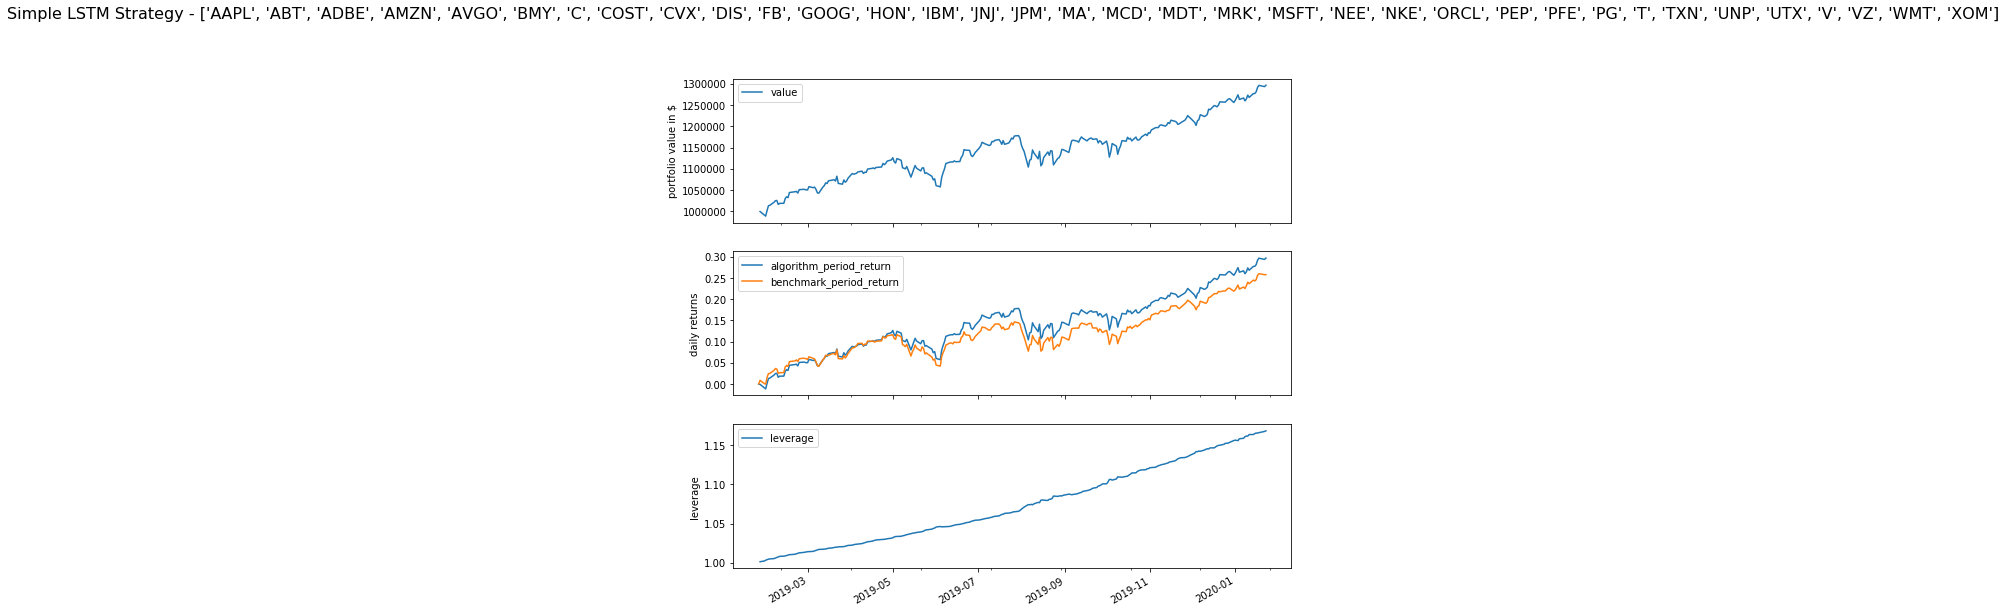

Final portfolio value (including cash): 1297047.01$
                             POS       SPY  algo_volatility  \
2020-01-15 21:00:00+00:00  405.0  0.002260         0.119699   
2020-01-16 21:00:00+00:00  406.0  0.008318         0.119665   
2020-01-17 21:00:00+00:00  407.0  0.003113         0.119455   
2020-01-21 21:00:00+00:00  407.0 -0.001958         0.119263   
2020-01-22 21:00:00+00:00  407.0  0.000121         0.119034   

                           algorithm_period_return     alpha  \
2020-01-15 21:00:00+00:00                 0.281485  0.032970   
2020-01-16 21:00:00+00:00                 0.291792  0.032715   
2020-01-17 21:00:00+00:00                 0.296675  0.033306   
2020-01-21 21:00:00+00:00                 0.293689  0.032755   
2020-01-22 21:00:00+00:00                 0.297047  0.035227   

                           benchmark_period_return  benchmark_volatility  \
2020-01-15 21:00:00+00:00                 0.245928              0.117881   
2020-01-16 21:00:00+00:00       

In [30]:
from zipline.api import order, record, symbol, set_benchmark,symbols
import zipline
import matplotlib.pyplot as plt
from datetime import datetime
perf = zipline.run_algorithm(start=datetime(2019, 1, 24, 0, 0, 0, 0, pytz.utc),
                      end=datetime(2020, 1, 22, 0, 0, 0, 0, pytz.utc),
                      initialize=initialize,
                      capital_base=1000000,
                      handle_data=handle_data,
                      analyze = analyze,
                      data=panel)
import pickle
with open('model_LSTM.pickle','wb') as f:
    pickle.dump(perf,f)

Start date,2019-01-24
End date,2020-01-22
Total months,11
,Backtest
Annual return,29.8%
Cumulative returns,29.7%
Annual volatility,11.9%
Sharpe ratio,2.25
Calmar ratio,4.74
Stability,0.90
Max drawdown,-6.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,6.29,2019-07-29,2019-08-05,2019-10-28,66
1,6.10,2019-04-30,2019-06-03,2019-06-18,36
2,1.88,2019-11-27,2019-12-03,2019-12-06,8
3,1.73,2019-03-21,2019-03-25,2019-04-01,8
4,1.47,2019-03-01,2019-03-08,2019-03-12,8


Stress Events,mean,min,max
New Normal,0.11%,-3.22%,2.12%


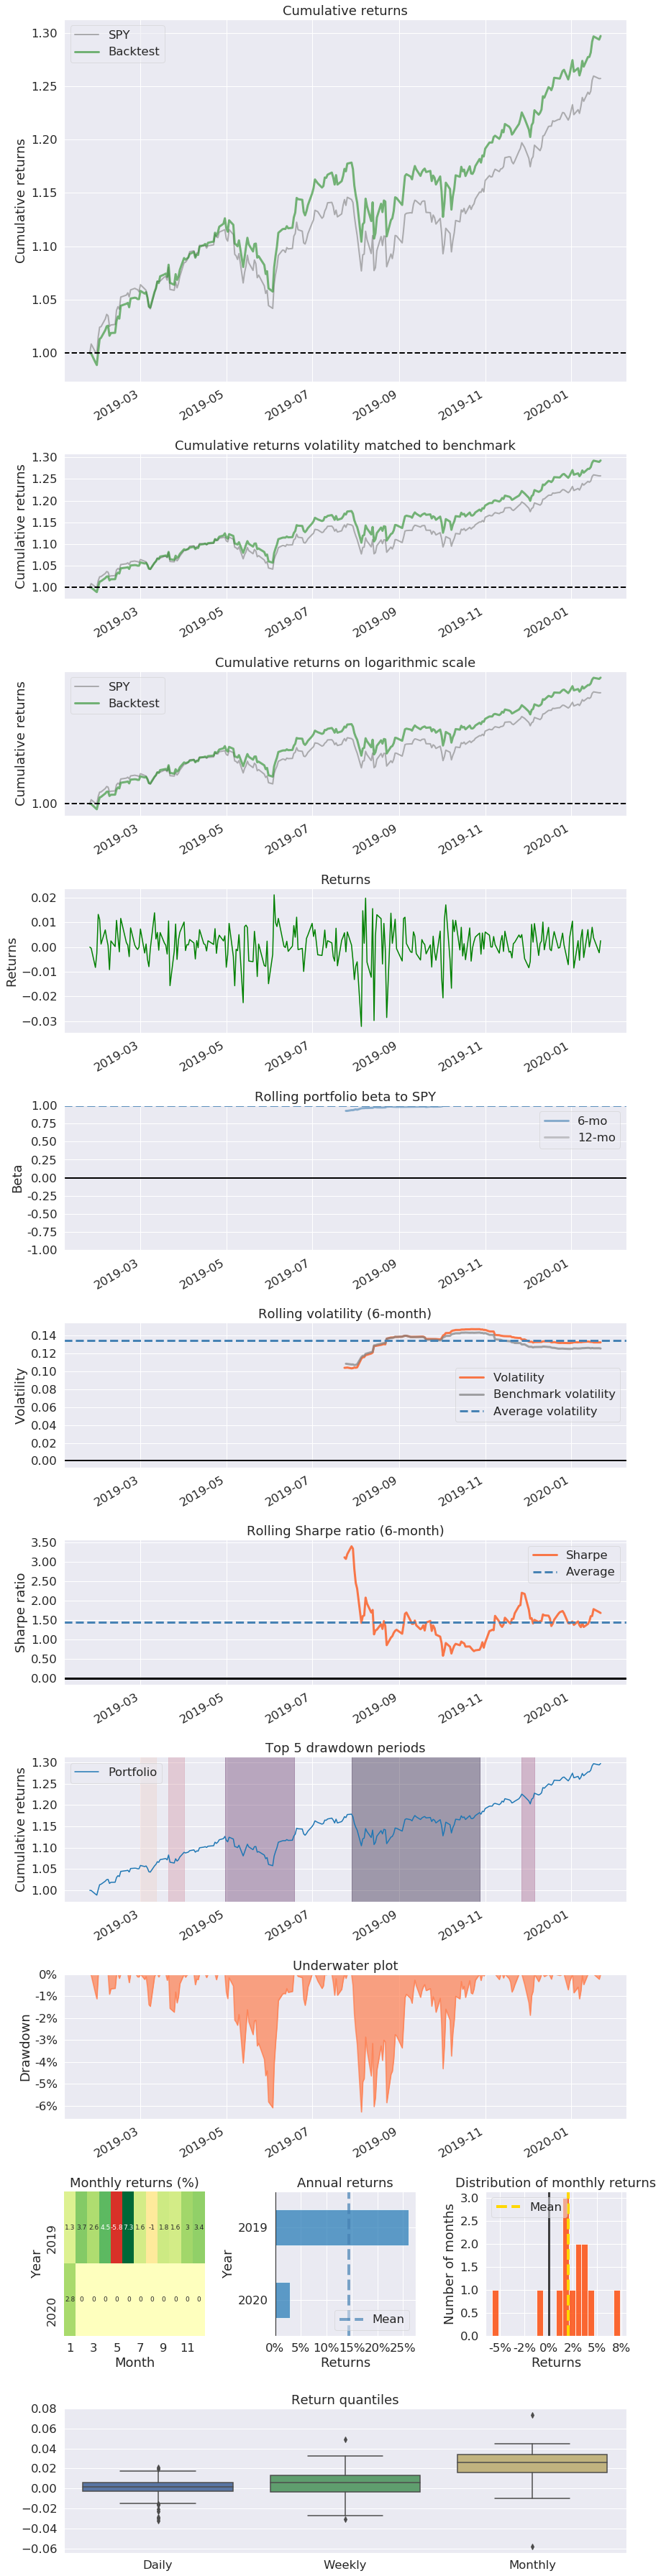

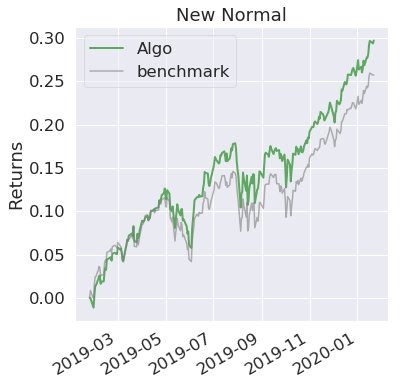

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipline
import warnings
import pyfolio as pf
LSTM_model3_results = pd.read_pickle('model_LSTM.pickle')
#print(LSTM_model3_results.columns)
SPY,returns, predict_returns = pf.utils.extract_rets_pos_txn_from_zipline(LSTM_model3_results)
algorithm = LSTM_model3_results.returns
SPY  =  LSTM_model3_results.SPY
pf.create_full_tear_sheet(algorithm,benchmark_rets=SPY)